In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from scipy.stats import linregress
import json
import requests
import seaborn as sns
import petpy as petpy
from config import api_key
from config import client_secret
from config import geoapify_key
from datetime import datetime,date
from datetime import date
import hvplot.pandas
import pytz
import folium
import geopandas as gpd

# Set the option to raise an error instead of a warning for chained assignments
pd.options.mode.chained_assignment = 'raise'

# Your code here

# Reset the option back to the default behavior (optional)
pd.options.mode.chained_assignment = None

In [2]:
#Petfinder API Wrapper
pf= petpy.Petfinder(key=api_key ,secret=client_secret)

In [3]:
#Find Listed Animals on Petfinder for animal type dog and status adoptable
dogs =  pf.animals(animal_type='dog', results_per_page=100,pages=40,return_df=True,location='Chicago, Illinois')  # Adjust results_per_page to limit the number of results
dogs



,id,organization_id,url,type,species,age,gender,size,coat,tags,...,contact.address.address1,contact.address.address2,contact.address.city,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id,primary_photo_cropped
0,69357341,IL192,https://www.petfinder.com/dog/taz-69357341/il/...,Dog,Dog,Baby,Male,Medium,Short,[],...,13005 Ernesti Rd,None,Huntley,IL,60142,US,69357341,dog,il192,NaN
1,69357338,IN610,https://www.petfinder.com/dog/abe-69357338/in/...,Dog,Dog,Young,Male,Large,None,[],...,None,None,Grovertown,IN,46531,US,69357338,dog,in610,NaN
2,69357337,IN610,https://www.petfinder.com/dog/ali-69357337/in/...,Dog,Dog,Young,Female,Large,None,[],...,None,None,Grovertown,IN,46531,US,69357337,dog,in610,NaN
3,69357331,WI111,https://www.petfinder.com/dog/uncle-frank-6935...,Dog,Dog,Young,Male,Medium,None,[],...,701 Northview Road,PO Box 834,Waukesha,WI,53187,US,69357331,dog,wi111,NaN
4,69356461,IN48,https://www.petfinder.com/dog/mars-69356461/in...,Dog,Dog,Adult,Male,Large,None,[],...,54687 County Road 19,None,Bristol,IN,46507,US,69356461,dog,in48,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,60840255,IL826,https://www.petfinder.com/dog/mel-60840255/il/...,Dog,Dog,Adult,Male,Large,Short,"[Affectionate, Playful, Smart, Friendly]",...,PO Box 463,None,Itasca,IL,60143,US,60840255,dog,il826,NaN
3996,60833490,IN678,https://www.petfinder.com/dog/flynn-aka-aj-608...,Dog,Dog,Baby,Male,Medium,None,[],...,None,None,Goshen,IN,46526,US,60833490,dog,in678,NaN
3997,60823157,IL673,https://www.petfinder.com/dog/brandy-60823157/...,Dog,Dog,Adult,Female,Medium,Short,[],...,None,None,Des Plaines,IL,60018,US,60823157,dog,il673,NaN
3998,60783957,IL23,https://www.petfinder.com/dog/olive-382-607839...,Dog,Dog,Adult,Male,Medium,Short,[],...,21 Salt Creek Lane,None,Hinsdale,IL,60521,US,60783957,dog,il23,NaN


In [4]:
#Drop  duplicate records with same id
dogs.drop_duplicates(subset=['id'],inplace=True)

In [5]:
dogs

,id,organization_id,url,type,species,age,gender,size,coat,tags,...,contact.address.address1,contact.address.address2,contact.address.city,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id,primary_photo_cropped
0,69357341,IL192,https://www.petfinder.com/dog/taz-69357341/il/...,Dog,Dog,Baby,Male,Medium,Short,[],...,13005 Ernesti Rd,None,Huntley,IL,60142,US,69357341,dog,il192,NaN
1,69357338,IN610,https://www.petfinder.com/dog/abe-69357338/in/...,Dog,Dog,Young,Male,Large,None,[],...,None,None,Grovertown,IN,46531,US,69357338,dog,in610,NaN
2,69357337,IN610,https://www.petfinder.com/dog/ali-69357337/in/...,Dog,Dog,Young,Female,Large,None,[],...,None,None,Grovertown,IN,46531,US,69357337,dog,in610,NaN
3,69357331,WI111,https://www.petfinder.com/dog/uncle-frank-6935...,Dog,Dog,Young,Male,Medium,None,[],...,701 Northview Road,PO Box 834,Waukesha,WI,53187,US,69357331,dog,wi111,NaN
4,69356461,IN48,https://www.petfinder.com/dog/mars-69356461/in...,Dog,Dog,Adult,Male,Large,None,[],...,54687 County Road 19,None,Bristol,IN,46507,US,69356461,dog,in48,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,60840255,IL826,https://www.petfinder.com/dog/mel-60840255/il/...,Dog,Dog,Adult,Male,Large,Short,"[Affectionate, Playful, Smart, Friendly]",...,PO Box 463,None,Itasca,IL,60143,US,60840255,dog,il826,NaN
3996,60833490,IN678,https://www.petfinder.com/dog/flynn-aka-aj-608...,Dog,Dog,Baby,Male,Medium,None,[],...,None,None,Goshen,IN,46526,US,60833490,dog,in678,NaN
3997,60823157,IL673,https://www.petfinder.com/dog/brandy-60823157/...,Dog,Dog,Adult,Female,Medium,Short,[],...,None,None,Des Plaines,IL,60018,US,60823157,dog,il673,NaN
3998,60783957,IL23,https://www.petfinder.com/dog/olive-382-607839...,Dog,Dog,Adult,Male,Medium,Short,[],...,21 Salt Creek Lane,None,Hinsdale,IL,60521,US,60783957,dog,il23,NaN


In [6]:
#Find Listed Animals on Petfinder for animal type dog and status adopted
adopted_dogs =  pf.animals(animal_type='dog', results_per_page=100,pages=40,return_df=True,location='Chicago, Illinois', status='adopted')  # Adjust results_per_page to limit the number of results
adopted_dogs

,id,organization_id,url,type,species,age,gender,size,coat,tags,...,contact.address.address1,contact.address.address2,contact.address.city,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id,primary_photo_cropped
0,69355273,IL53,https://www.petfinder.com/dog/johnny-69355273/...,Dog,Dog,Adult,Male,Large,None,[],...,4927 Main Street,None,Skokie,IL,60077,US,69355273,dog,il53,NaN
1,69347233,WI542,https://www.petfinder.com/dog/sheila-69347233/...,Dog,Dog,Adult,Female,Medium,None,[],...,None,None,Salem,WI,53168,US,69347233,dog,wi542,NaN
2,69344451,IN559,https://www.petfinder.com/dog/arla-69344451/in...,Dog,Dog,Baby,Female,Small,Short,"[Friendly, Playful, Curious, Funny, Athletic]",...,4611 Evans Ave,None,Valparaiso,IN,46383,US,69344451,dog,in559,NaN
3,69343718,MI957,https://www.petfinder.com/dog/zeus-69343718/mi...,Dog,Dog,Young,Male,Large,None,[],...,None,None,Niles,MI,49120,US,69343718,dog,mi957,NaN
4,69343717,MI957,https://www.petfinder.com/dog/teddy-69343717/m...,Dog,Dog,Adult,Male,Medium,None,[],...,None,None,Niles,MI,49120,US,69343717,dog,mi957,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,66448369,IL81,https://www.petfinder.com/dog/2550-66448369/il...,Dog,Dog,Senior,Male,Medium,None,[],...,16173 Baseline Road,None,Genoa,IL,60135,US,66448369,dog,il81,NaN
3996,66448387,IL81,https://www.petfinder.com/dog/shelly-66448387/...,Dog,Dog,Young,Female,Medium,None,[],...,16173 Baseline Road,None,Genoa,IL,60135,US,66448387,dog,il81,NaN
3997,66448393,IL81,https://www.petfinder.com/dog/karma-66448393/i...,Dog,Dog,Adult,Female,Medium,None,[],...,16173 Baseline Road,None,Genoa,IL,60135,US,66448393,dog,il81,NaN
3998,66448405,IL81,https://www.petfinder.com/dog/norton-66448405/...,Dog,Dog,Young,Male,Medium,None,[],...,16173 Baseline Road,None,Genoa,IL,60135,US,66448405,dog,il81,NaN


In [7]:
#Drop  duplicate records with same id
adopted_dogs.drop_duplicates(subset=['id'],inplace=True)

In [8]:
adopted_dogs

,id,organization_id,url,type,species,age,gender,size,coat,tags,...,contact.address.address1,contact.address.address2,contact.address.city,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id,primary_photo_cropped
0,69355273,IL53,https://www.petfinder.com/dog/johnny-69355273/...,Dog,Dog,Adult,Male,Large,None,[],...,4927 Main Street,None,Skokie,IL,60077,US,69355273,dog,il53,NaN
1,69347233,WI542,https://www.petfinder.com/dog/sheila-69347233/...,Dog,Dog,Adult,Female,Medium,None,[],...,None,None,Salem,WI,53168,US,69347233,dog,wi542,NaN
2,69344451,IN559,https://www.petfinder.com/dog/arla-69344451/in...,Dog,Dog,Baby,Female,Small,Short,"[Friendly, Playful, Curious, Funny, Athletic]",...,4611 Evans Ave,None,Valparaiso,IN,46383,US,69344451,dog,in559,NaN
3,69343718,MI957,https://www.petfinder.com/dog/zeus-69343718/mi...,Dog,Dog,Young,Male,Large,None,[],...,None,None,Niles,MI,49120,US,69343718,dog,mi957,NaN
4,69343717,MI957,https://www.petfinder.com/dog/teddy-69343717/m...,Dog,Dog,Adult,Male,Medium,None,[],...,None,None,Niles,MI,49120,US,69343717,dog,mi957,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,66448369,IL81,https://www.petfinder.com/dog/2550-66448369/il...,Dog,Dog,Senior,Male,Medium,None,[],...,16173 Baseline Road,None,Genoa,IL,60135,US,66448369,dog,il81,NaN
3996,66448387,IL81,https://www.petfinder.com/dog/shelly-66448387/...,Dog,Dog,Young,Female,Medium,None,[],...,16173 Baseline Road,None,Genoa,IL,60135,US,66448387,dog,il81,NaN
3997,66448393,IL81,https://www.petfinder.com/dog/karma-66448393/i...,Dog,Dog,Adult,Female,Medium,None,[],...,16173 Baseline Road,None,Genoa,IL,60135,US,66448393,dog,il81,NaN
3998,66448405,IL81,https://www.petfinder.com/dog/norton-66448405/...,Dog,Dog,Young,Male,Medium,None,[],...,16173 Baseline Road,None,Genoa,IL,60135,US,66448405,dog,il81,NaN


In [9]:
#Identify Duplicate Index Values
duplicate_indices_dogs = dogs.index[dogs.index.duplicated(keep=False)]
duplicate_indices_adopted_dogs = adopted_dogs.index[adopted_dogs.index.duplicated(keep=False)]

In [10]:
#Remove Duplicate Index Values
dogs.reset_index(drop=True, inplace=True)
adopted_dogs.reset_index(drop=True, inplace=True)

In [11]:
#Concatenate the DataFrames:
merged = pd.concat([dogs, adopted_dogs],ignore_index=True)

In [12]:
merged_df = merged[['id', 'organization_id', 'url', 'species', 'age', 'gender',
       'size', 'coat', 'tags', 'name', 'description', 'organization_animal_id',
       'photos', 'status', 'status_changed_at', 'published_at',
       'distance', 'breeds.primary', 'breeds.secondary', 'breeds.mixed',
       'breeds.unknown', 'colors.primary', 'colors.secondary',
       'colors.tertiary','attributes.special_needs', 'attributes.shots_current',
       'environment.children', 'environment.dogs', 'environment.cats',
       'contact.address.address1',
       'contact.address.address2', 'contact.address.city',
       'contact.address.state', 'contact.address.postcode',
       'contact.address.country', 'animal_id', 'animal_type',
       'organization_id']]



In [13]:
merged_df.columns

Index(['id', 'organization_id', 'organization_id', 'url', 'species', 'age',
       'gender', 'size', 'coat', 'tags', 'name', 'description',
       'organization_animal_id', 'photos', 'status', 'status_changed_at',
       'published_at', 'distance', 'breeds.primary', 'breeds.secondary',
       'breeds.mixed', 'breeds.unknown', 'colors.primary', 'colors.secondary',
       'colors.tertiary', 'attributes.special_needs',
       'attributes.shots_current', 'environment.children', 'environment.dogs',
       'environment.cats', 'contact.address.address1',
       'contact.address.address2', 'contact.address.city',
       'contact.address.state', 'contact.address.postcode',
       'contact.address.country', 'animal_id', 'animal_type',
       'organization_id', 'organization_id'],
      dtype='object')

In [27]:
merged_df['published_at'] = pd.to_datetime(merged_df['published_at'])
merged_df['status_changed_at'] = pd.to_datetime(merged_df['status_changed_at'])


In [28]:
merged_df['days_on_petfinder'] = (merged_df['status_changed_at'] - merged_df['published_at']).dt.days
merged_df['days_on_petfinder'] = merged_df['days_on_petfinder'].round()

In [29]:
today = datetime.now()

merged_df['today']= datetime.now()

In [24]:
central_timezone = pytz.timezone('US/Central')
aware_datetime = today.astimezone(central_timezone)
aware_datetime

datetime.datetime(2023, 10, 19, 10, 13, 50, 914339, tzinfo=<DstTzInfo 'US/Central' CDT-1 day, 19:00:00 DST>)

In [30]:
merged_df['today'] = aware_datetime

merged_df['adoptable_days_online'] =(merged_df['today'] - merged_df['published_at']).dt.days

In [31]:
address_df = merged_df.iloc[:,30:36]
address_df

,contact.address.address1,contact.address.address2,contact.address.city,contact.address.state,contact.address.postcode,contact.address.country
0,13005 Ernesti Rd,None,Huntley,IL,60142,US
1,None,None,Grovertown,IN,46531,US
2,None,None,Grovertown,IN,46531,US
3,701 Northview Road,PO Box 834,Waukesha,WI,53187,US
4,54687 County Road 19,None,Bristol,IN,46507,US
...,...,...,...,...,...,...
7978,16173 Baseline Road,None,Genoa,IL,60135,US
7979,16173 Baseline Road,None,Genoa,IL,60135,US
7980,16173 Baseline Road,None,Genoa,IL,60135,US
7981,16173 Baseline Road,None,Genoa,IL,60135,US


In [32]:

address_df['combined_address'] = address_df.apply(lambda row: ', '.join(str(x) for x in row), axis=1)
address_df


,contact.address.address1,contact.address.address2,contact.address.city,contact.address.state,contact.address.postcode,contact.address.country,combined_address
0,13005 Ernesti Rd,None,Huntley,IL,60142,US,"13005 Ernesti Rd, None, Huntley, IL, 60142, US"
1,None,None,Grovertown,IN,46531,US,"None, None, Grovertown, IN, 46531, US"
2,None,None,Grovertown,IN,46531,US,"None, None, Grovertown, IN, 46531, US"
3,701 Northview Road,PO Box 834,Waukesha,WI,53187,US,"701 Northview Road, PO Box 834, Waukesha, WI, ..."
4,54687 County Road 19,None,Bristol,IN,46507,US,"54687 County Road 19, None, Bristol, IN, 46507..."
...,...,...,...,...,...,...,...
7978,16173 Baseline Road,None,Genoa,IL,60135,US,"16173 Baseline Road, None, Genoa, IL, 60135, US"
7979,16173 Baseline Road,None,Genoa,IL,60135,US,"16173 Baseline Road, None, Genoa, IL, 60135, US"
7980,16173 Baseline Road,None,Genoa,IL,60135,US,"16173 Baseline Road, None, Genoa, IL, 60135, US"
7981,16173 Baseline Road,None,Genoa,IL,60135,US,"16173 Baseline Road, None, Genoa, IL, 60135, US"


In [33]:
merged_df['address'] = address_df['combined_address']

In [35]:
merged_df.to_csv("merged_dog_data.csv")

In [36]:
merged_df.columns

Index(['id', 'organization_id', 'organization_id', 'url', 'species', 'age',
       'gender', 'size', 'coat', 'tags', 'name', 'description',
       'organization_animal_id', 'photos', 'status', 'status_changed_at',
       'published_at', 'distance', 'breeds.primary', 'breeds.secondary',
       'breeds.mixed', 'breeds.unknown', 'colors.primary', 'colors.secondary',
       'colors.tertiary', 'attributes.special_needs',
       'attributes.shots_current', 'environment.children', 'environment.dogs',
       'environment.cats', 'contact.address.address1',
       'contact.address.address2', 'contact.address.city',
       'contact.address.state', 'contact.address.postcode',
       'contact.address.country', 'animal_id', 'animal_type',
       'organization_id', 'organization_id', 'days_on_petfinder', 'today',
       'adoptable_days_online', 'address'],
      dtype='object')

Dogs average days for adaption by color

In [113]:
dogs_data_adopted = merged_df.groupby(['colors.primary'] ,as_index=False)['days_on_petfinder'].mean().round().sort_values(by ='days_on_petfinder',ascending=False).head(10)
dogs_data_adopted

,colors.primary,days_on_petfinder
7,Harlequin,40.0
1,Bicolor,9.0
12,"Tricolor (Brown, Black, & White)",9.0
5,Golden,8.0
6,Gray / Blue / Silver,8.0
3,Brindle,7.0
11,Sable,7.0
14,Yellow / Tan / Blond / Fawn,7.0
2,Black,6.0
4,Brown / Chocolate,6.0


Text(0, 0.5, 'Number of days for adoption')

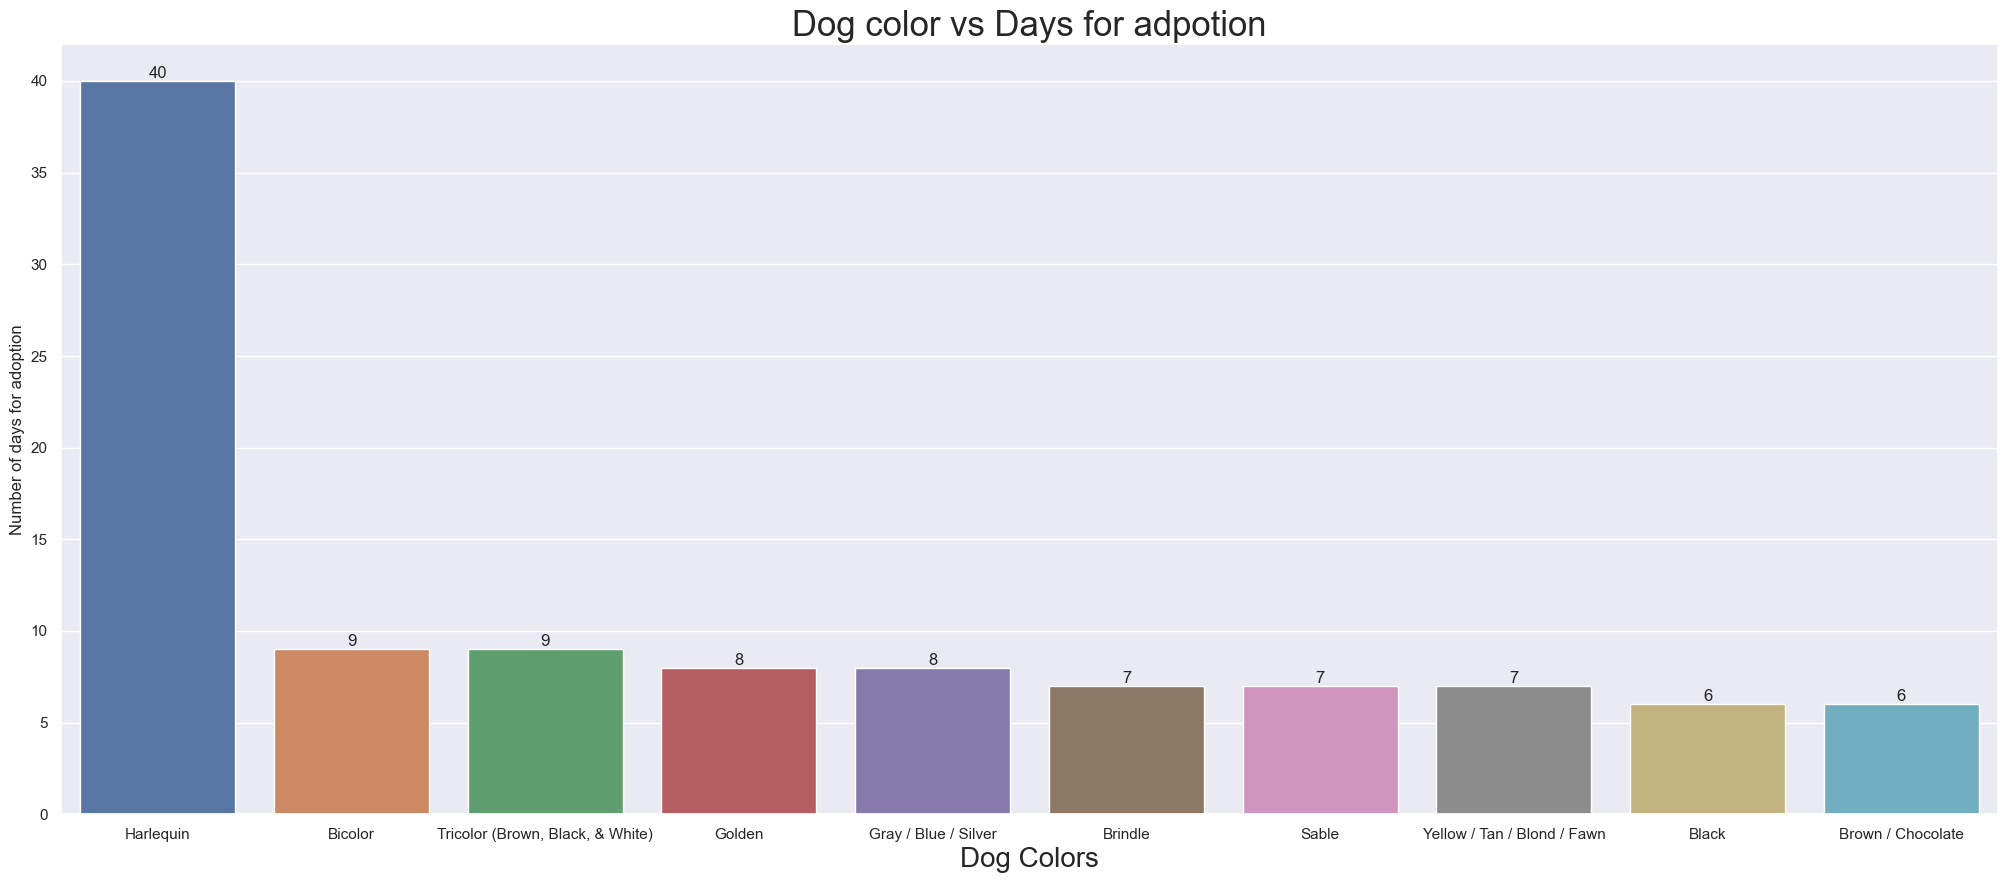

In [119]:

#Sets the size of the bars

ax =sns.barplot(x = 'colors.primary',data = dogs_data_adopted,y ='days_on_petfinder')
sns.set(rc={'figure.figsize':(25,10)})

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Dog color vs Days for adpotion",fontsize=25)
plt.xlabel("Dog Colors",fontsize=20)
plt.ylabel("Number of days for adoption"fontsize=20 )

Dogs average days which a adoptable  by color

In [128]:
dogs_data_adoptable = merged_df.groupby(['colors.primary'] ,as_index=False)['adoptable_days_online'].mean().sort_values(by ='adoptable_days_online',ascending=False).head(10)
dogs_data_adoptable

,colors.primary,adoptable_days_online
7,Harlequin,69.500000
11,Sable,62.826087
3,Brindle,52.488987
5,Golden,49.066667
10,Red / Chestnut / Orange,48.719101
9,Merle (Red),48.363636
4,Brown / Chocolate,48.281457
6,Gray / Blue / Silver,46.580838
14,Yellow / Tan / Blond / Fawn,45.483957
2,Black,43.880851


<Axes: xlabel='colors.primary', ylabel='adoptable_days_online'>

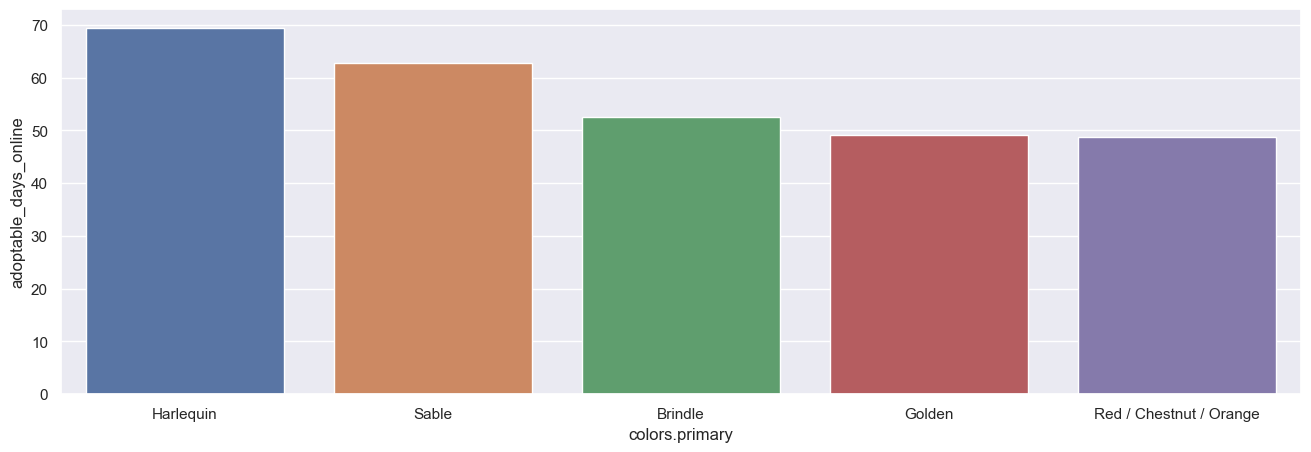

In [44]:

#Sets the size of the bars
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(x = 'colors.primary',data = dogs_data_adoptable,y ='adoptable_days_online')

***Total percentage of Dogs which were adpoted or adoptable by color***

In [190]:
color_counts = merged_df['colors.primary'].value_counts()
color_counts

colors.primary
Black                               940
White / Cream                       604
Yellow / Tan / Blond / Fawn         374
Brown / Chocolate                   302
Tricolor (Brown, Black, & White)    250
Brindle                             227
Red / Chestnut / Orange             178
Apricot / Beige                     174
Gray / Blue / Silver                167
Bicolor                             150
Golden                               90
Merle (Blue)                         32
Sable                                23
Merle (Red)                          11
Harlequin                             4
Name: count, dtype: int64

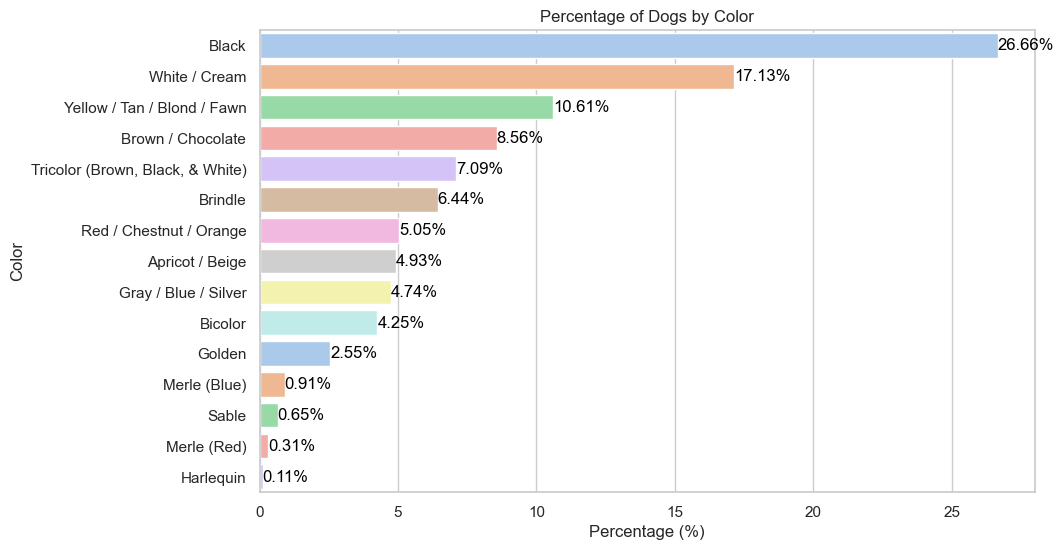

In [290]:
color_counts = merged_df['colors.primary'].value_counts()
# Calculate the percentages
total_count = color_counts.sum()
color_percentages = (color_counts / total_count) * 100

# Create a horizontal bar chart showing percentages
plt.figure(figsize=(10, 6))
sns.set_palette('pastel')
ax=sns.barplot(x=color_percentages, y=color_counts.index, palette='pastel')

plt.xlabel('Percentage (%)')
plt.ylabel('Color')
plt.title('Percentage of Dogs by Color')

# Annotate the bars with percentage values
for i, v in enumerate(color_percentages):
    ax.text(v, i, f'{v:.2f}%', color='black', va='center')

plt.show()

***Breed distribution according to Color***

In [267]:
color_df= merged_df.groupby(merged_df['colors.primary'])['status'].value_counts().sort_values(ascending=False).head(20)
color_df = pd.DataFrame(color_df)
color_df = color_df.reset_index()
color_df

,colors.primary,status,count
0,Black,adoptable,631
1,White / Cream,adoptable,414
2,Black,adopted,309
3,Yellow / Tan / Blond / Fawn,adoptable,250
4,Brown / Chocolate,adoptable,219
5,White / Cream,adopted,190
6,Brindle,adoptable,171
7,"Tricolor (Brown, Black, & White)",adoptable,133
8,Yellow / Tan / Blond / Fawn,adopted,124
9,Gray / Blue / Silver,adoptable,120


Most adoptable Color

In [268]:
most_adoptable_color = color_df.loc[color_df['status'] == 'adoptable']
most_adoptable_color.set_index('colors.primary',inplace=True)
most_adoptable_color

,status,count
colors.primary,,
Black,adoptable,631
White / Cream,adoptable,414
Yellow / Tan / Blond / Fawn,adoptable,250
Brown / Chocolate,adoptable,219
Brindle,adoptable,171
"Tricolor (Brown, Black, & White)",adoptable,133
Gray / Blue / Silver,adoptable,120
Red / Chestnut / Orange,adoptable,113
Apricot / Beige,adoptable,104


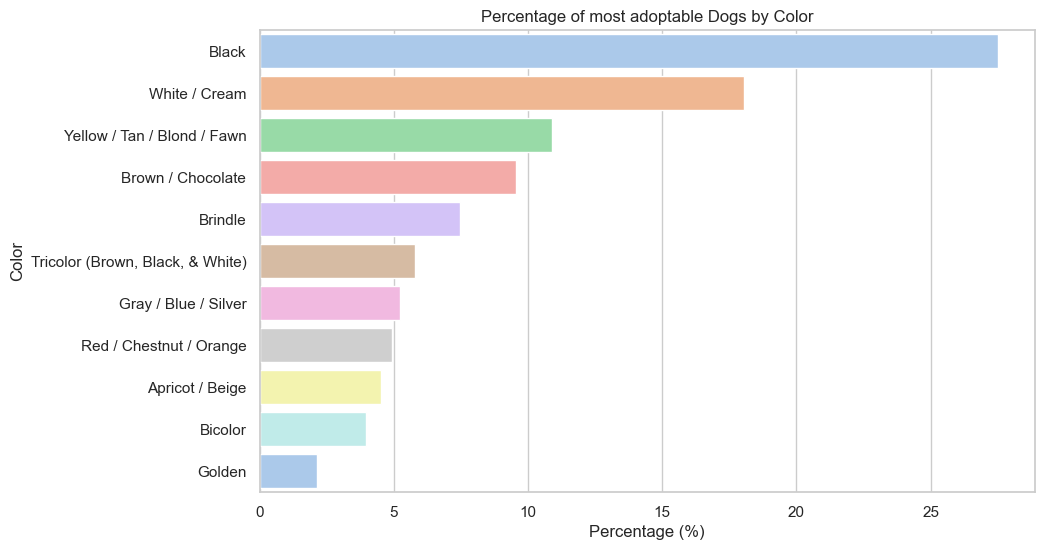

In [271]:
most_adoptable_color_counts = most_adoptable_color['count']
# Calculate the percentages
total_count = most_adoptable_color_counts.sum()
most_adoptable_color_percentages = (most_adoptable_color_counts / total_count) * 100

# Create a horizontal bar chart showing percentages
plt.figure(figsize=(10, 6))
sns.set_palette('pastel')
ax=sns.barplot(x=most_adoptable_color_percentages, y= most_adoptable_color_counts.index, palette='pastel')

plt.xlabel('Percentage (%)')
plt.ylabel('Color')
plt.title('Percentage of most adoptable Dogs by Color')


plt.show()

Most adopted Color

In [270]:
most_adopted_color = color_df.loc[color_df['status'] == 'adopted']
most_adopted_color.set_index('colors.primary',inplace=True)
most_adopted_color

,status,count
colors.primary,,
Black,adopted,309
White / Cream,adopted,190
Yellow / Tan / Blond / Fawn,adopted,124
"Tricolor (Brown, Black, & White)",adopted,117
Brown / Chocolate,adopted,83
Apricot / Beige,adopted,70
Red / Chestnut / Orange,adopted,65
Bicolor,adopted,59
Brindle,adopted,56


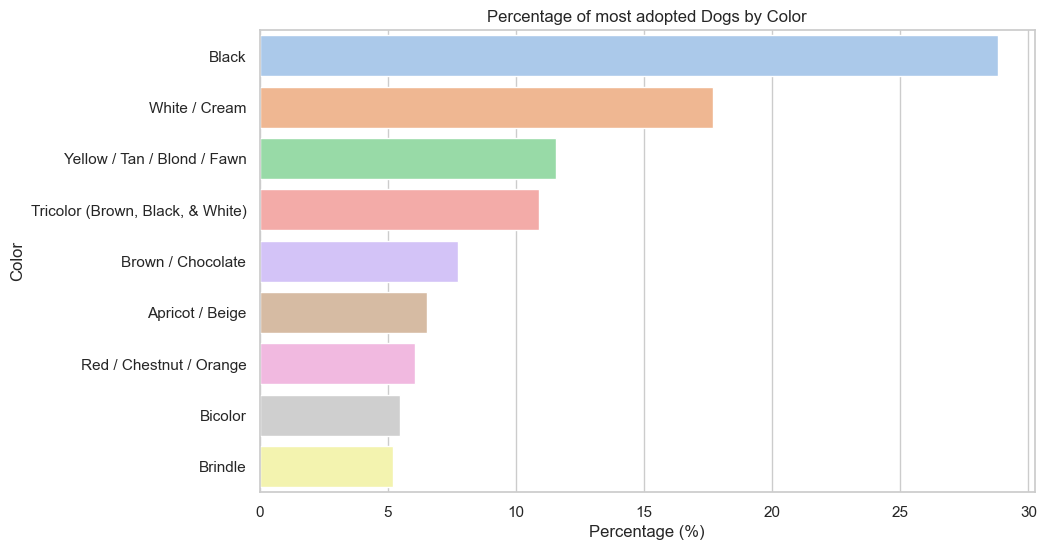

In [272]:
most_adopted_color_counts = most_adopted_color['count']
# Calculate the percentages
total_count = most_adopted_color_counts.sum()
most_adopted_color_percentages = (most_adopted_color_counts / total_count) * 100

# Create a horizontal bar chart showing percentages
plt.figure(figsize=(10, 6))
sns.set_palette('pastel')
ax=sns.barplot(x=most_adopted_color_percentages, y= most_adopted_color_counts.index, palette='pastel')

plt.xlabel('Percentage (%)')
plt.ylabel('Color')
plt.title('Percentage of most adopted Dogs by Color')


plt.show()

In [1]:
t_statistic, p_value = stats.ttest_ind(most_adoptable_color['count'], most_adopted_color['count'])

plt.hist(most_adoptable_color['count'], alpha=0.5, label='Data 1', color='blue')
plt.hist(most_adopted_color['count'], alpha=0.5, label='Data 2', color='red')

plt.axvline(x=t_statistic, color='green', linestyle='--', label=f't-statistic: {t_statistic:.2f}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

print(t_statistic,p_value)

NameError: name 'stats' is not defined

***Age distribution according to status***

In [245]:
age_df= merged_df.groupby(merged_df['age'])['status'].value_counts().sort_values(ascending=False)
age_df = pd.DataFrame(age_df)
age_df = age_df.reset_index()
age_df

,age,status,count
0,Adult,adopted,1897
1,Adult,adoptable,1586
2,Baby,adoptable,1231
3,Young,adoptable,952
4,Young,adopted,866
5,Baby,adopted,855
6,Senior,adopted,370
7,Senior,adoptable,226


Most adoptable Age

In [256]:
most_adoptable_age = age_df.loc[age_df['status'] == 'adoptable']
most_adoptable_age.set_index('age',inplace=True)
most_adoptable_age

,status,count
age,,
Adult,adoptable,1586
Baby,adoptable,1231
Young,adoptable,952
Senior,adoptable,226


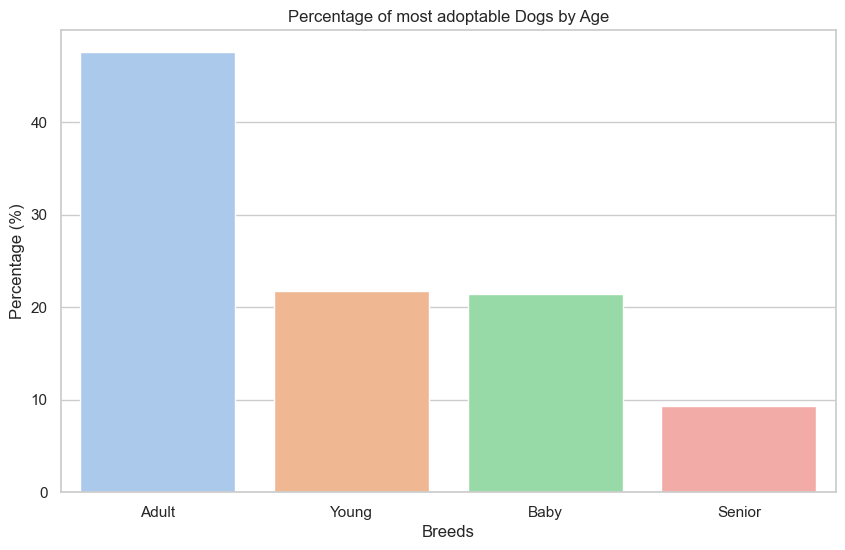

In [255]:
most_adoptable_age_counts = most_adoptable_age['count']
# Calculate the percentages
total_count = most_adoptable_age_counts.sum()
most_adopted_age_percentages = (most_adoptable_age_counts / total_count) * 100

# Create a horizontal bar chart showing percentages
plt.figure(figsize=(10, 6))
sns.set_palette('pastel')
ax=sns.barplot(y=most_adopted_age_percentages, x= most_adoptable_age_counts.index, palette='pastel')

plt.ylabel('Percentage (%)')
plt.xlabel('Breeds')
plt.title('Percentage of most adoptable Dogs by Age')


plt.show()

Most adopted Age

In [250]:
most_adopted_age = age_df.loc[age_df['status'] == 'adopted']
most_adopted_age.set_index('age',inplace=True)
most_adopted_age

,status,count
age,,
Adult,adopted,1897
Young,adopted,866
Baby,adopted,855
Senior,adopted,370


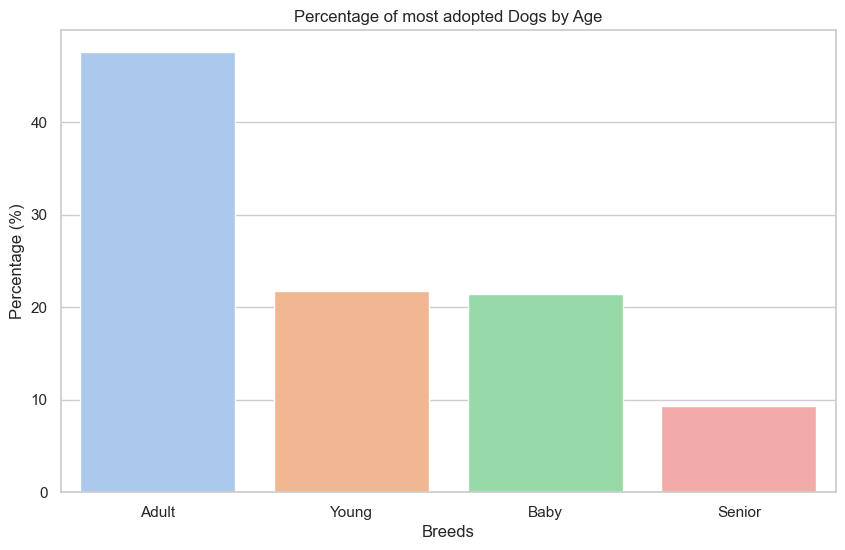

In [253]:
most_adopted_age_counts = most_adopted_age['count']
# Calculate the percentages
total_count = most_adopted_age_counts.sum()
most_adopted_age_percentages = (most_adopted_age_counts / total_count) * 100

# Create a horizontal bar chart showing percentages
plt.figure(figsize=(10, 6))
sns.set_palette('pastel')
ax=sns.barplot(y=most_adopted_age_percentages, x= most_adopted_age_counts.index, palette='pastel')

plt.ylabel('Percentage (%)')
plt.xlabel('Breeds')
plt.title('Percentage of most adopted Dogs by Age')


plt.show()

***Breed distribution according to status***


In [247]:
breed_df= merged_df.groupby(merged_df['breeds.primary'])['status'].value_counts().sort_values(ascending=False)
breed_df = pd.DataFrame(breed_df)
breed_df = breed_df.reset_index()
breed_df

,breeds.primary,status,count
0,Pit Bull Terrier,adoptable,540
1,Mixed Breed,adoptable,433
2,Labrador Retriever,adopted,386
3,Chihuahua,adopted,342
4,Labrador Retriever,adoptable,307
...,...,...,...
307,Silky Terrier,adoptable,1
308,Field Spaniel,adoptable,1
309,Smooth Fox Terrier,adoptable,1
310,Redbone Coonhound,adopted,1


Top ten breeds which are adoptable

In [242]:
most_adoptable_breed = breed_df.loc[breed_df['status'] == 'adoptable'].head(10)
most_adoptable_breed.set_index('breeds.primary',inplace=True)
most_adoptable_breed

,status,count
breeds.primary,,
Pit Bull Terrier,adoptable,540
Mixed Breed,adoptable,433
Labrador Retriever,adoptable,307
Chihuahua,adoptable,194
German Shepherd Dog,adoptable,178
Terrier,adoptable,161
Shepherd,adoptable,126
American Staffordshire Terrier,adoptable,117
Husky,adoptable,102


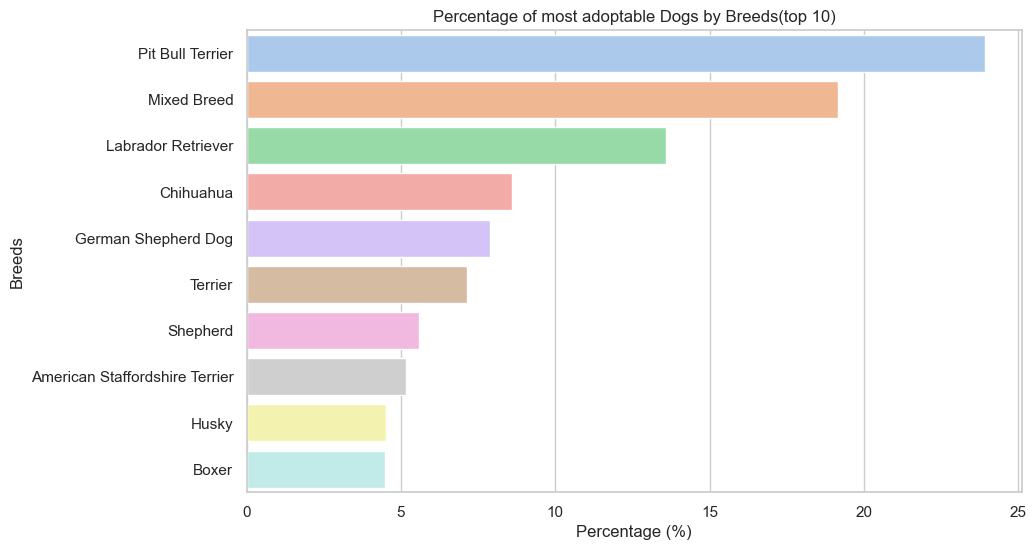

In [244]:
most_adoptable_breed_counts = most_adoptable_breed['count']
# Calculate the percentages
total_count = most_adoptable_breed_counts.sum()
most_adopted_breed_percentages = (most_adoptable_breed_counts / total_count) * 100

# Create a horizontal bar chart showing percentages
plt.figure(figsize=(10, 6))
sns.set_palette('pastel')
ax=sns.barplot(x=most_adopted_breed_percentages, y= most_adoptable_breed_counts.index, palette='pastel')

plt.xlabel('Percentage (%)')
plt.ylabel('Breeds')
plt.title('Percentage of most adoptable Dogs by Breeds(top 10)')


plt.show()

Most adopted breed top 10

In [227]:
breed_df= merged_df.groupby(merged_df['breeds.primary'])['status'].value_counts().sort_values(ascending=False)
breed_df = pd.DataFrame(breed_df)
breed_df = breed_df.reset_index()
breed_df.columns

Index(['breeds.primary', 'status', 'count'], dtype='object')

In [234]:

most_adopted_breed = breed_df.loc[breed_df['status'] == 'adopted'].head(10)
most_adopted_breed.set_index('breeds.primary',inplace=True)
most_adopted_breed


,status,count
breeds.primary,,
Labrador Retriever,adopted,386
Chihuahua,adopted,342
Mixed Breed,adopted,269
Terrier,adopted,226
German Shepherd Dog,adopted,174
Pit Bull Terrier,adopted,144
Beagle,adopted,128
Shepherd,adopted,123
Husky,adopted,119


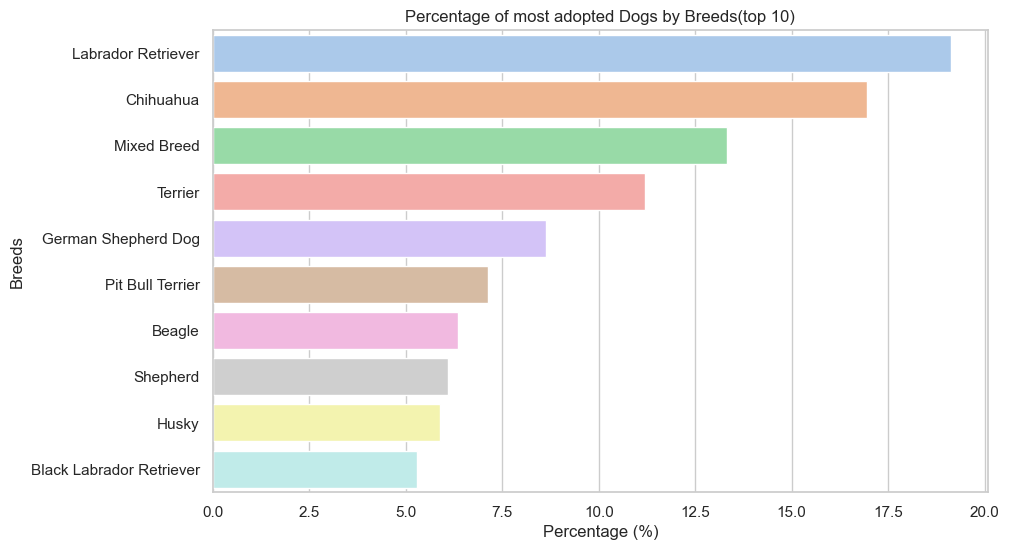

In [235]:
most_adopted_breed_counts = most_adopted_breed['count']
# Calculate the percentages
total_count = most_adopted_breed_counts.sum()
most_adopted_breed_percentages = (most_adopted_breed_counts / total_count) * 100

# Create a horizontal bar chart showing percentages
plt.figure(figsize=(10, 6))
sns.set_palette('pastel')
ax=sns.barplot(x=most_adopted_breed_percentages, y= most_adopted_breed_counts.index, palette='pastel')

plt.xlabel('Percentage (%)')
plt.ylabel('Breeds')
plt.title('Percentage of most adopted Dogs by Breeds(top 10)')


plt.show()

Data for Organization

In [273]:
merged_df.columns

Index(['id', 'organization_id', 'organization_id', 'url', 'species', 'age',
       'gender', 'size', 'coat', 'tags', 'name', 'description',
       'organization_animal_id', 'photos', 'status', 'status_changed_at',
       'published_at', 'distance', 'breeds.primary', 'breeds.secondary',
       'breeds.mixed', 'breeds.unknown', 'colors.primary', 'colors.secondary',
       'colors.tertiary', 'attributes.special_needs',
       'attributes.shots_current', 'environment.children', 'environment.dogs',
       'environment.cats', 'contact.address.address1',
       'contact.address.address2', 'contact.address.city',
       'contact.address.state', 'contact.address.postcode',
       'contact.address.country', 'animal_id', 'animal_type',
       'organization_id', 'organization_id', 'days_on_petfinder', 'today',
       'adoptable_days_online', 'address'],
      dtype='object')

In [276]:
#Create a new dataframe fro the organizations from where you can adopt a pet
cities_df =pd.DataFrame()
cities_df['City']=merged_df['contact.address.city']
cities_df['Address']=merged_df['address']
cities_df['State']=merged_df['contact.address.state']
cities_df['url']=merged_df['url']
cities_df['species'] =merged_df['species']
cities_df['status'] = merged_df['status']
cities_df["Lat"] = ""
cities_df["Lon"] = ""
cities_df

,City,Address,State,url,species,status,Lat,Lon
0,Huntley,"13005 Ernesti Rd, None, Huntley, IL, 60142, US",IL,https://www.petfinder.com/dog/taz-69357341/il/...,Dog,adoptable,,
1,Grovertown,"None, None, Grovertown, IN, 46531, US",IN,https://www.petfinder.com/dog/abe-69357338/in/...,Dog,adoptable,,
2,Grovertown,"None, None, Grovertown, IN, 46531, US",IN,https://www.petfinder.com/dog/ali-69357337/in/...,Dog,adoptable,,
3,Waukesha,"701 Northview Road, PO Box 834, Waukesha, WI, ...",WI,https://www.petfinder.com/dog/uncle-frank-6935...,Dog,adoptable,,
4,Bristol,"54687 County Road 19, None, Bristol, IN, 46507...",IN,https://www.petfinder.com/dog/mars-69356461/in...,Dog,adoptable,,
...,...,...,...,...,...,...,...,...
7978,Genoa,"16173 Baseline Road, None, Genoa, IL, 60135, US",IL,https://www.petfinder.com/dog/2550-66448369/il...,Dog,adopted,,
7979,Genoa,"16173 Baseline Road, None, Genoa, IL, 60135, US",IL,https://www.petfinder.com/dog/shelly-66448387/...,Dog,adopted,,
7980,Genoa,"16173 Baseline Road, None, Genoa, IL, 60135, US",IL,https://www.petfinder.com/dog/karma-66448393/i...,Dog,adopted,,
7981,Genoa,"16173 Baseline Road, None, Genoa, IL, 60135, US",IL,https://www.petfinder.com/dog/norton-66448405/...,Dog,adopted,,


In [275]:
#Drop duplicate 
cities_df.drop_duplicates(subset='Address', keep='first', inplace=True)
cities_df

,City,Address,State,url,species,Lat,Lon
0,Huntley,"13005 Ernesti Rd, None, Huntley, IL, 60142, US",IL,https://www.petfinder.com/dog/taz-69357341/il/...,Dog,,
1,Grovertown,"None, None, Grovertown, IN, 46531, US",IN,https://www.petfinder.com/dog/abe-69357338/in/...,Dog,,
3,Waukesha,"701 Northview Road, PO Box 834, Waukesha, WI, ...",WI,https://www.petfinder.com/dog/uncle-frank-6935...,Dog,,
4,Bristol,"54687 County Road 19, None, Bristol, IN, 46507...",IN,https://www.petfinder.com/dog/mars-69356461/in...,Dog,,
5,Muskego,"None, None, Muskego, WI, 53150, US",WI,https://www.petfinder.com/dog/luna-the-cattle-...,Dog,,
...,...,...,...,...,...,...,...
5566,Greenfield,"5005 S 74th Street, None, Greenfield, WI, 5322...",WI,https://www.petfinder.com/dog/majors-the-borde...,Dog,,
5593,West Allis,"None, None, West Allis, WI, 53219, US",WI,https://www.petfinder.com/dog/rosie-68641592/w...,Dog,,
6801,Ingleside,"None, None, Ingleside, IL, 60041, US",IL,https://www.petfinder.com/dog/burrell-66649131...,Dog,,
6820,West Dundee,"None, None, West Dundee, IL, 60118, US",IL,https://www.petfinder.com/dog/lucia-66647657/i...,Dog,,


Get the latitude and longitude for the city where the organization is based

In [164]:
# Define the API parameters
params = {
    "apiKey":geoapify_key,
    "format":"json"
}

# Set base URL
base_url = "https://api.geoapify.com/v1/geocode/search"

In [165]:
# Print a message to follow up the airport search


# Loop through the cities_pd DataFrame and search coordinates for each city
for index, row in cities_df.iterrows():

    # Get the city's name & add ", Australia" to the string so geoapify finds the correct city
    city = row["City"] +"," +row["State"]+ ", US"

    # Add the current city to the parameters
    params["text"] = f"{city}"

    # Make the API request
    response = requests.get(base_url, params=params)
    
    # Convert response to JSON
    response = response.json()
  

    # Extract latitude and longitude
    cities_df.loc[index, "Lat"] = response["results"][0]["lat"]
    cities_df.loc[index, "Lon"] = response["results"][0]["lon"]
    
# Display sample data to confirm that the coordinates appear
cities_df.head()

,City,Address,State,url,Lat,Lon
0,Huntley,"13005 Ernesti Rd, None, Huntley, IL, 60142, US",IL,https://www.petfinder.com/dog/taz-69357341/il/...,42.17225,-88.42692
1,Grovertown,"None, None, Grovertown, IN, 46531, US",IN,https://www.petfinder.com/dog/abe-69357338/in/...,41.375043,-86.504734
3,Waukesha,"701 Northview Road, PO Box 834, Waukesha, WI, ...",WI,https://www.petfinder.com/dog/uncle-frank-6935...,43.011678,-88.231481
4,Bristol,"54687 County Road 19, None, Bristol, IN, 46507...",IN,https://www.petfinder.com/dog/mars-69356461/in...,41.721441,-85.817536
5,Muskego,"None, None, Muskego, WI, 53150, US",WI,https://www.petfinder.com/dog/luna-the-cattle-...,42.905848,-88.138978


In [169]:
%%capture --no-display



# Create a map using hvplot
map_plot =cities_df.hvplot.points("Lon", 
                                   "Lat", 
                                   geo = True,
                                   frame_width=500,
                                   frame_height=500,
                                   color = "City",
                                   alpha = 0.8,
                                   size = 100,
                                   tiles = "OSM",
                                   hover_cols = ["Address","url"]
                                  )

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (City,Address,url)

In [288]:
top_organization = cities_df.groupby(cities_df['Address'])[['status']].value_counts().sort_values(ascending=False)
top_organization = pd.DataFrame(top_organization)
top_organization = top_organization.reset_index()

top_organization

,Address,status,count
0,"16173 Baseline Road, None, Genoa, IL, 60135, US",adopted,1240
1,"None, None, Salem, WI, 53168, US",adopted,878
2,"None, None, Morton Grove, IL, 60053, US",adoptable,302
3,"2975 N Milwaukee Ave, None, Northbrook, IL, 60...",adoptable,164
4,"13005 Ernesti Rd, None, Huntley, IL, 60142, US",adopted,138
...,...,...,...
433,"None, None, Antioch, IL, 60002, US",adoptable,1
434,"None, None, Mundelein, IL, 60060, US",adoptable,1
435,"None, None, Arlington Heights, IL, 60004, US",adoptable,1
436,"None, None, Mount Prospect, IL, 60056, US",adoptable,1


**Top Organization from where dogs were adopted**

In [285]:
top_organization_apoted_df=top_organization.loc[top_organization['status'] == 'adopted'].head(10)
top_organization_apoted_df.set_index('Address',inplace=True)
top_organization_apoted_df


,status,count
Address,,
"16173 Baseline Road, None, Genoa, IL, 60135, US",adopted,1240
"None, None, Salem, WI, 53168, US",adopted,878
"13005 Ernesti Rd, None, Huntley, IL, 60142, US",adopted,138
"None, None, Hillside, IL, 60162, US",adopted,76
"S47 W30760 State Road 59, None, North Prairie, WI, 53153, US",adopted,75
"2250 Barber Greene Road, None, DeKalb, IL, 60115, US",adopted,56
"PO Box 4074, None, Aurora, IL, 60507, US",adopted,54
"21 Salt Creek Lane, None, Hinsdale, IL, 60521, US",adopted,51
"6379 N Paulina St., (Corner of Paulina and Devon), Chicago, IL, 60660, US",adopted,51


**Top Organization where more dogs are adoptable**

In [283]:
top_organization_adoptable_df=top_organization.loc[top_organization['status'] == 'adoptable'].head(10)
top_organization_adoptable_df.set_index('Address',inplace=True)
top_organization_adoptable_df


,status,count
Address,,
"None, None, Morton Grove, IL, 60053, US",adoptable,302
"2975 N Milwaukee Ave, None, Northbrook, IL, 60062, US",adoptable,164
"13005 Ernesti Rd, None, Huntley, IL, 60142, US",adoptable,110
"None, None, Downers Grove, IL, 60516, US",adoptable,88
"21800 Central Ave, None, Matteson, IL, 60443, US",adoptable,81
"2741 S. Western Ave., None, Chicago, IL, 60608, US",adoptable,77
"None, None, Orland Park, IL, 60462, US",adoptable,67
"1000 S. LaFox St. (Route 31), None, South Elgin, IL, 60177, US",adoptable,63
"None, None, Oswego, IL, 60543, US",adoptable,63


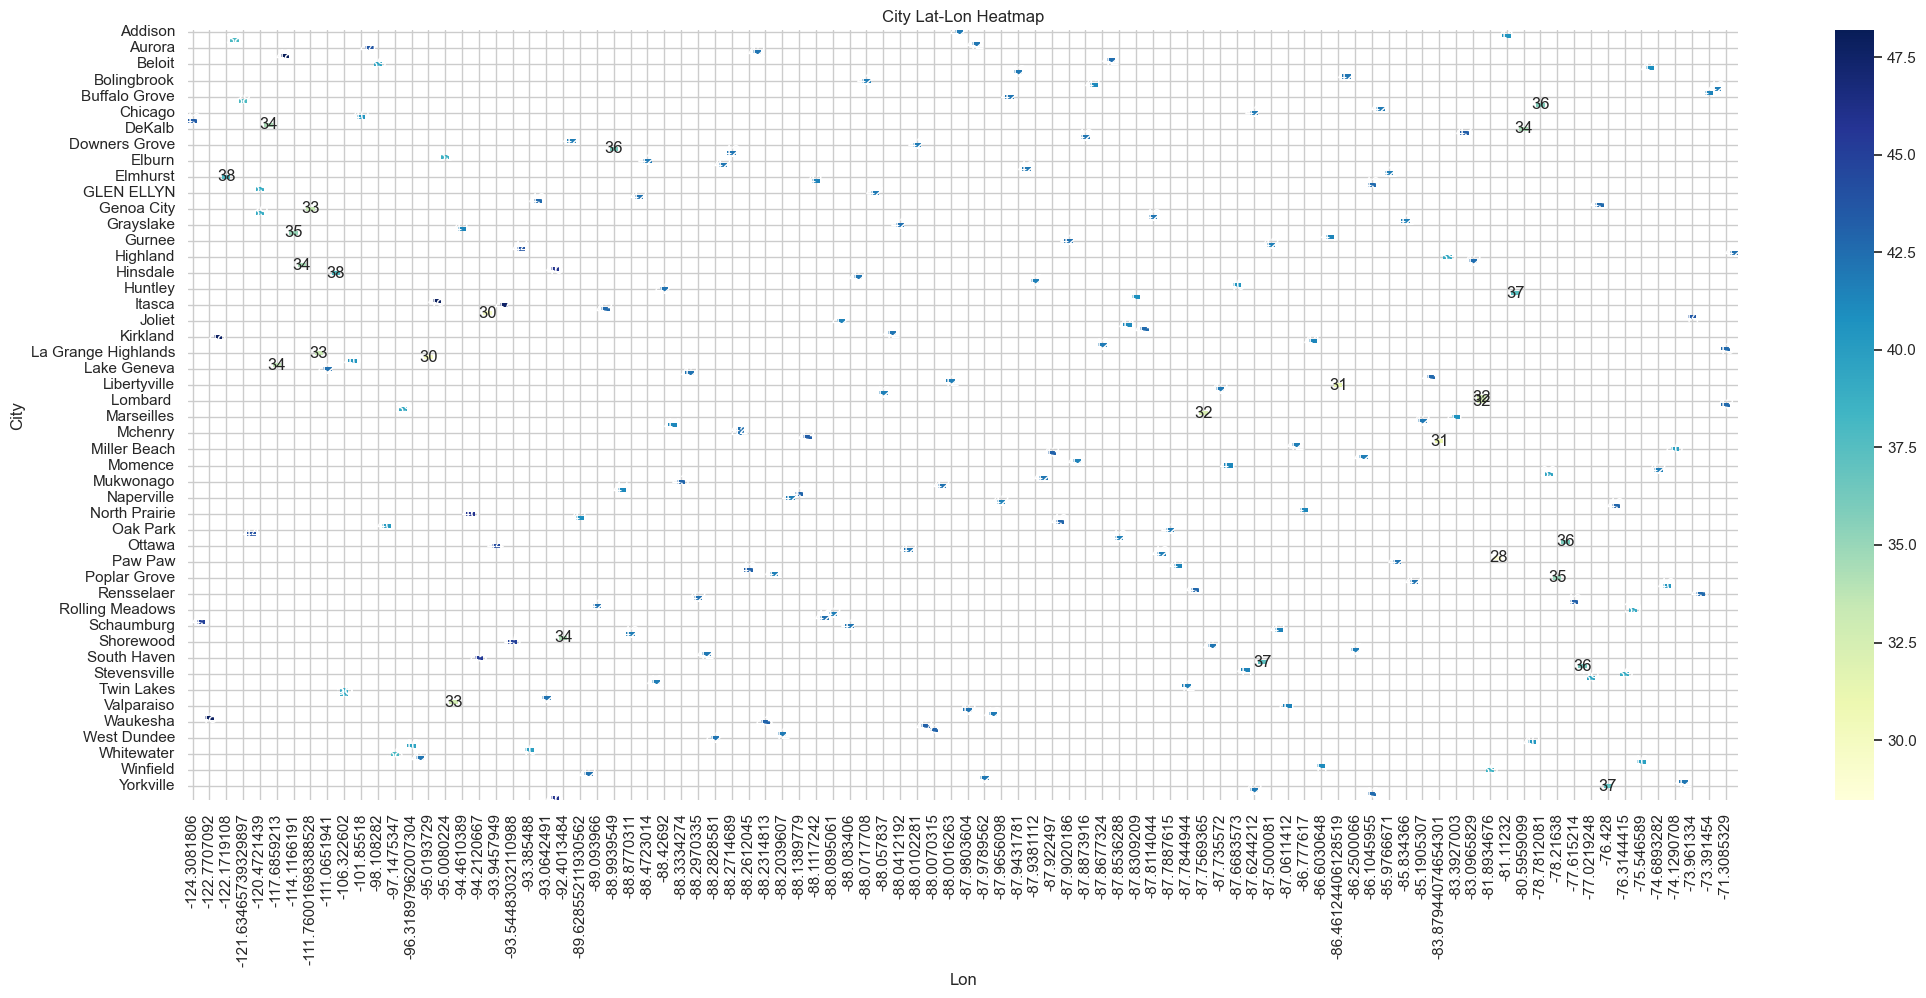

In [132]:
# Create a heatmap using Seaborn
sns.set(style="whitegrid")  # Optional style settings

# Pivot the data to create a suitable format for the heatmap
heatmap_data = cities_df.pivot_table(index='City', values='Lat', columns='Lon')

ax = sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")

# Customize the plot
plt.title("City Lat-Lon Heatmap")
plt.show()